In [214]:
import time
import pandas as pd
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook
from glob import glob
import json
import folium
import warnings
import requests
from urllib.parse import urlparse, quote
import matplotlib as mpl
import matplotlib.pyplot as plt
warnings.simplefilter(action='ignore',category=FutureWarning)
%matplotlib inline
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

In [215]:
cctv_Seoul = pd.read_excel("서울시 자치구 년도별 CCTV 설치 현황(2011년 이전_2018년).xlsx")
cctv_Seoul.head()

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671


In [216]:
cctv_Seoul.columns

Index(['기관명', '소계', '2011년 이전', '2012년', '2013년', '2014년', '2015년', '2016년',
       '2017년', '2018년'],
      dtype='object')

In [217]:
cctv_Seoul.columns[0]

'기관명'

In [218]:
cctv_Seoul.rename(columns={cctv_Seoul.columns[0] : '구별'}, inplace=True)
cctv_Seoul.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671


In [219]:
pop_Seoul = pd.read_csv('report.txt',sep = "\t", engine='python',encoding='utf-8',thousands = ',')
pop_Seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2020.3/4,합계,4405833,9953009,4840912,5112097,9699232,4719170,4980062,253777,121742,132035,2.2,1552356
3,2020.3/4,종로구,74861,159842,77391,82451,149952,73024,76928,9890,4367,5523,2,28396
4,2020.3/4,중구,63594,135321,66193,69128,125800,61526,64274,9521,4667,4854,1.98,24265


In [220]:
pop_Seoul.columns

Index(['기간', '자치구', '세대', '인구', '인구.1', '인구.2', '인구.3', '인구.4', '인구.5', '인구.6',
       '인구.7', '인구.8', '세대당인구', '65세이상고령자'],
      dtype='object')

In [221]:
pop2_Seoul = pd.DataFrame({
    '구별':pop_Seoul['자치구'][2:],
    '인구수':pop_Seoul['인구'][2:],
    '한국인':pop_Seoul['인구.3'][2:],
    '외국인':pop_Seoul['인구.6'][2:],
    '고령자':pop_Seoul['65세이상고령자'][2:],
})
pop2_Seoul.head()

,구별,인구수,한국인,외국인,고령자
2,합계,9953009,9699232,253777,1552356
3,종로구,159842,149952,9890,28396
4,중구,135321,125800,9521,24265
5,용산구,244953,229786,15167,39995
6,성동구,302695,295591,7104,45372


In [222]:
cctv_Seoul.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671


In [223]:
cctv_Seoul.sort_values(by='소계',ascending=True).head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
9,도 봉 구,858,197.0,66.0,8.0,185,59,155,117,71
24,중 랑 구,1068,NaN,NaN,NaN,770,102,121,66,9
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319
22,종 로 구,1471,8.0,7.0,599.0,132,195,148,281,101
23,중 구,1544,25.0,165.0,114.0,80,245,270,317,328


In [224]:
cctv_Seoul.sort_values(by='소계',ascending=False).head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671
6,구 로 구,3227,852.0,219.0,349.0,187,268,326,540,486
16,성 북 구,3003,779.0,84.0,304.0,241,279,388,285,643
21,은 평 구,2962,1365.0,83.0,99.0,343,180,296,229,367


In [225]:
cctv_Seoul['최근증가율'] = (cctv_Seoul['2018년'] + cctv_Seoul['2017년'] + cctv_Seoul['2016년'])/cctv_Seoul['2015년']*100
cctv_Seoul.sort_values(by='최근증가율',ascending=False).head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율
5,광 진 구,1581,470.0,42.0,83.0,87,64,21,468,346,1304.687500
13,서대문구,2121,565.0,233.0,214.0,114,109,277,415,194,812.844037
18,양 천 구,2775,772.0,161.0,185.0,169,172,349,137,830,765.116279
11,동 작 구,1780,238.0,93.0,29.0,503,130,254,278,255,605.384615
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385,591.666667


In [226]:
pop2_Seoul = pop2_Seoul.reset_index()
del pop2_Seoul['index']
pop2_Seoul.head()


,구별,인구수,한국인,외국인,고령자
0,합계,9953009,9699232,253777,1552356
1,종로구,159842,149952,9890,28396
2,중구,135321,125800,9521,24265
3,용산구,244953,229786,15167,39995
4,성동구,302695,295591,7104,45372


In [227]:
#pop2_Seoul.drop([0],inplace=True)

In [228]:
#위에꺼 적용이 안되서 바꿨습니다
pop2_Seoul = pop2_Seoul.iloc[1:]
pop2_Seoul

,구별,인구수,한국인,외국인,고령자
1,종로구,159842,149952,9890,28396
2,중구,135321,125800,9521,24265
3,용산구,244953,229786,15167,39995
4,성동구,302695,295591,7104,45372
5,광진구,361923,348064,13859,50047
6,동대문구,358679,344416,14263,61408
7,중랑구,400989,395997,4992,68658
8,성북구,449871,439719,10152,73370
9,강북구,313550,309996,3554,62951
10,도봉구,329300,327248,2052,61388


In [229]:
pop2_Seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [230]:
type(pop2_Seoul['인구수'][2])

str

In [231]:
pop2_Seoul['인구수'] = pop2_Seoul['인구수'].apply(pd.to_numeric)
pop2_Seoul['외국인'] = pop2_Seoul['외국인'].apply(pd.to_numeric)
pop2_Seoul['고령자'] = pop2_Seoul['고령자'].apply(pd.to_numeric)

In [250]:
pop2_Seoul['외국인비율'] = pop2_Seoul['외국인'] / pop2_Seoul['인구수'] * 100
pop2_Seoul['고령자비율'] = pop2_Seoul['고령자'] / pop2_Seoul['인구수'] * 100
pop2_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,159842,149952,9890,28396,6.187360,17.765043
2,중구,135321,125800,9521,24265,7.035863,17.931437
3,용산구,244953,229786,15167,39995,6.191800,16.327622
4,성동구,302695,295591,7104,45372,2.346917,14.989346
5,광진구,361923,348064,13859,50047,3.829268,13.828079


In [233]:
pop2_Seoul.sort_values(by='인구수',ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,676673,670331,6342,92149,0.937233,13.617951
16,강서구,589536,583544,5992,88052,1.016393,14.935814
23,강남구,544085,539235,4850,73942,0.891405,13.590156
11,노원구,529532,525486,4046,84612,0.764071,15.978638
21,관악구,514555,498574,15981,78206,3.105790,15.198764


In [234]:
pop2_Seoul.sort_values(by='외국인',ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,405982,375630,30352,60826,7.476194,14.982438
17,구로구,435751,405579,30172,69312,6.924138,15.906332
18,금천구,249641,232157,17484,39361,7.003657,15.767041
21,관악구,514555,498574,15981,78206,3.105790,15.198764
3,용산구,244953,229786,15167,39995,6.191800,16.327622


In [235]:
pop2_Seoul.sort_values(by='외국인비율',ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,405982,375630,30352,60826,7.476194,14.982438
2,중구,135321,125800,9521,24265,7.035863,17.931437
18,금천구,249641,232157,17484,39361,7.003657,15.767041
17,구로구,435751,405579,30172,69312,6.924138,15.906332
3,용산구,244953,229786,15167,39995,6.191800,16.327622


In [236]:
pop2_Seoul.sort_values(by='고령자',ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,676673,670331,6342,92149,0.937233,13.617951
16,강서구,589536,583544,5992,88052,1.016393,14.935814
11,노원구,529532,525486,4046,84612,0.764071,15.978638
12,은평구,485842,481546,4296,84353,0.884238,17.362229
21,관악구,514555,498574,15981,78206,3.105790,15.198764


In [237]:
pop2_Seoul.sort_values(by='고령자비율',ascending=False)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,313550,309996,3554,62951,1.133472,20.076862
10,도봉구,329300,327248,2052,61388,0.623140,18.641968
2,중구,135321,125800,9521,24265,7.035863,17.931437
1,종로구,159842,149952,9890,28396,6.187360,17.765043
12,은평구,485842,481546,4296,84353,0.884238,17.362229
7,중랑구,400989,395997,4992,68658,1.244922,17.122165
6,동대문구,358679,344416,14263,61408,3.976536,17.120601
13,서대문구,323860,313212,10648,53869,3.287840,16.633422
3,용산구,244953,229786,15167,39995,6.191800,16.327622
8,성북구,449871,439719,10152,73370,2.256647,16.309120


In [238]:
# 구별 안에 공백이 있어 제거했습니다
cctv_Seoul['구별'] = cctv_Seoul['구별'].str.replace(' ','')

In [239]:
data_result = pd.merge(cctv_Seoul, pop2_Seoul, on='구별')
data_result.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448,327.838828,544085,539235,4850,73942,0.891405,13.590156
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385,591.666667,462275,458058,4217,68798,0.912228,14.882483
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319,395.862069,313550,309996,3554,62951,1.133472,20.076862
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254,378.609626,589536,583544,5992,88052,1.016393,14.935814
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671,325.779967,514555,498574,15981,78206,3.105790,15.198764


In [240]:
del data_result['2011년 이전']
del data_result['2012년']
del data_result['2013년']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
del data_result['2017년']
del data_result['2018년']
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,5221,327.838828,544085,539235,4850,73942,0.891405,13.590156
1,강동구,1879,591.666667,462275,458058,4217,68798,0.912228,14.882483
2,강북구,1265,395.862069,313550,309996,3554,62951,1.133472,20.076862
3,강서구,1617,378.609626,589536,583544,5992,88052,1.016393,14.935814
4,관악구,3985,325.779967,514555,498574,15981,78206,3.105790,15.198764


In [241]:
data_result.set_index('구별', inplace=True)

In [242]:
data_result.loc['중구']

소계          1544
최근증가율    373.469
인구수       135321
한국인       125800
외국인         9521
고령자        24265
외국인비율    7.03586
고령자비율    17.9314
Name: 중구, dtype: object

In [243]:
np.corrcoef(data_result['고령자비율'],data_result['소계'])

array([[ 1.        , -0.45361392],
       [-0.45361392,  1.        ]])

In [244]:
np.corrcoef(data_result['외국인비율'],data_result['소계'])

array([[ 1.        , -0.06150919],
       [-0.06150919,  1.        ]])

In [251]:
np.corrcoef(data_result['인구수'],data_result['소계'])

array([[1.        , 0.38021221],
       [0.38021221, 1.        ]])

### 그래프그리기

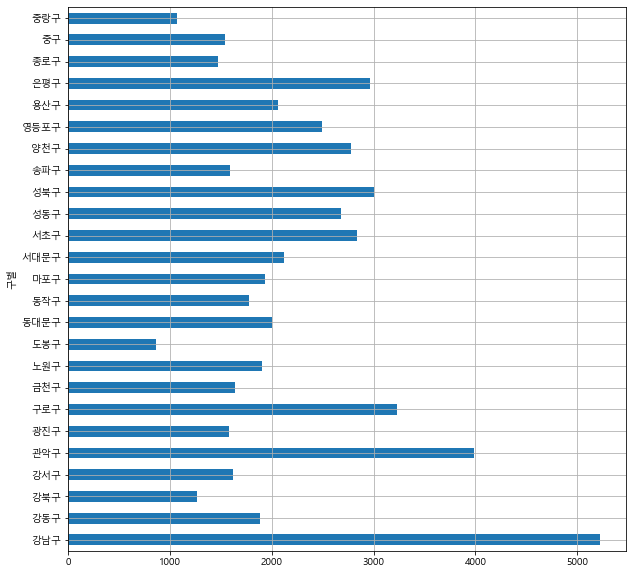

In [246]:
data_result['소계'].plot(kind='barh',grid=True,figsize=(10,10))
plt.show()

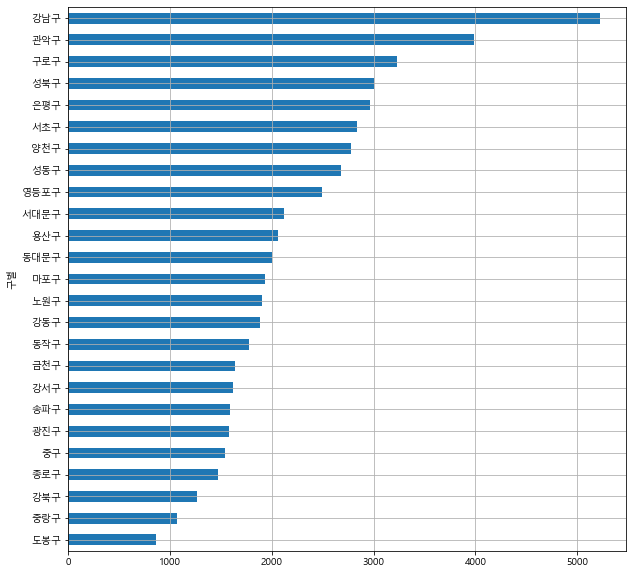

In [247]:
data_result['소계'].sort_values().plot(kind='barh',grid=True,figsize=(10,10))
plt.show()

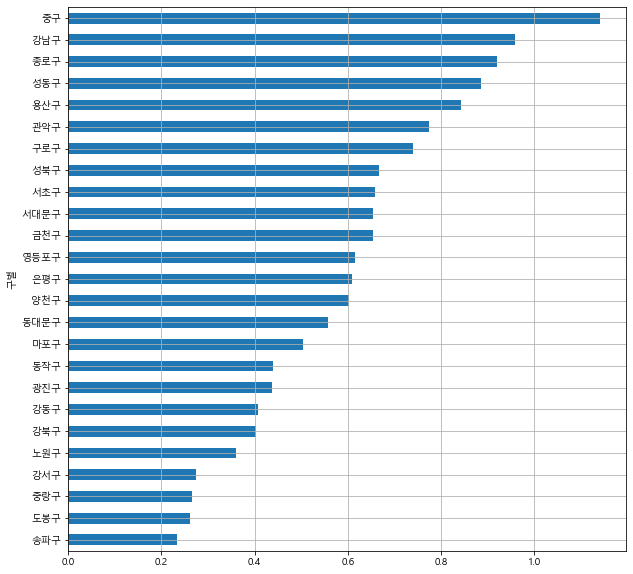

In [252]:
data_result['CCTV비율'] = data_result['소계'] / data_result['인구수'] * 100
data_result['CCTV비율'].sort_values().plot(kind='barh',grid=True,figsize=(10,10))
plt.show()

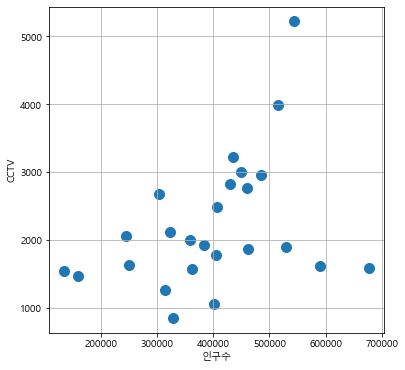

In [253]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'],data_result['소계'],s=100)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [254]:
fp1 = np.polyfit(data_result['인구수'],data_result['소계'],1)
fp1

array([2.89293854e-03, 1.06798227e+03])

In [255]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000,700000,100)

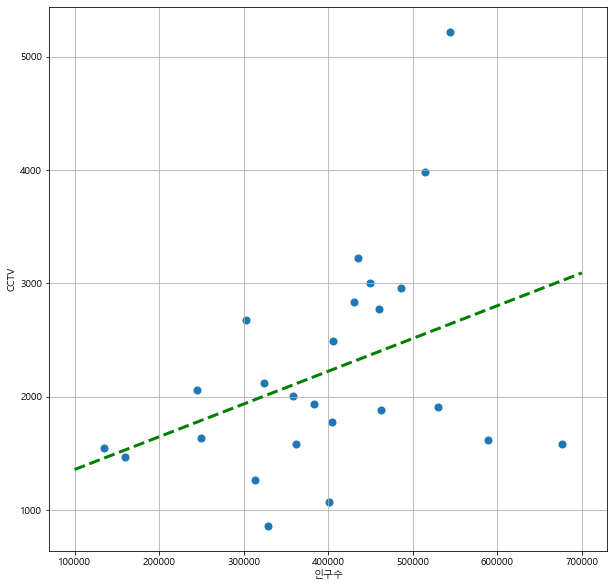

In [256]:
plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'],data_result['소계'],s=50)
plt.plot(fx,f1(fx),ls='dashed',lw=3,color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()


In [259]:
fp1 = np.polyfit(data_result['인구수'],data_result['소계'],1)
f1 = np.poly1d(fp1)
fx = np.linspace(100000,700000,100)
data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))
df_sort = data_result.sort_values(by='오차',ascending=False)
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,5221,327.838828,544085,539235,4850,73942,0.891405,13.590156,0.959593,2579.013268
송파구,1586,368.674699,676673,670331,6342,92149,0.937233,13.617951,0.234382,1439.555667
관악구,3985,325.779967,514555,498574,15981,78206,3.105790,15.198764,0.774456,1428.441743
도봉구,858,581.355932,329300,327248,2052,61388,0.623140,18.641968,0.260553,1162.626928
중랑구,1068,192.156863,400989,395997,4992,68658,1.244922,17.122165,0.266341,1160.018799


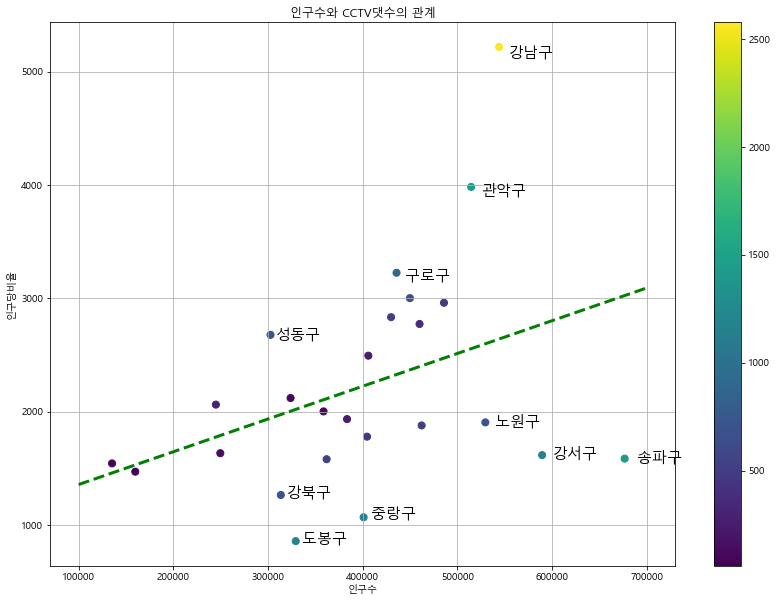

In [266]:
plt.figure(figsize=(14,10))
plt.scatter(data_result['인구수'],data_result['소계'],c=data_result['오차'],s=50)
plt.plot(fx,f1(fx),ls='dashed',lw=3,color='g')

for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98,
            df_sort.index[n],fontsize=15)
plt.xlabel('인구수')
plt.ylabel('인구당비율')
plt.title("인구수와 CCTV댓수의 관계")
plt.colorbar()
plt.grid()
plt.show()